<a href="http://www.cosmostat.org/" target="_blank"><img align="left" width="300" src="http://www.cosmostat.org/wp-content/uploads/2017/07/CosmoStat-Logo_WhiteBK-e1499155861666.png" alt="CosmoStat Logo"></a>
<br>
<br>
<br>
<br>

# Scipy, Matplotlib and useful tricks applied to Cosmology

---

> Author: <a href="http://www.cosmostat.org/people/santiago-casas" target="_blank" style="text-decoration:none; color: #F08080">Santiago Casas</a>

> Email: <a href="mailto:santiago.casas@cea.fr" style="text-decoration:none; color: #F08080">santiago.casas@cea.fr</a>  
> Year: 2019  
> Version: 1.0


---
<br>

## Let's import some useful libraries

In [1]:
# Tell Jupyter to display plots in this notebook.
%matplotlib inline
##
import numpy as np #numpy for arrays and numerics
import pandas as pd  #pandas for working with ordered datasets
import scipy as sci  # for scientific functions
import matplotlib.pyplot as plt  # for plotting
# Import interaction module.
from ipywidgets.widgets import *


> In this tutorial we will do some basic cosmology use functions, dictionaries, numpy arrays, matplotlib and scipy, to illustrate some of the common tools used by researchers in their everyday life.

# The redshift

The cosmological redshift we observe in galaxies (their spectral lines move towards larger wavelengths) $z$ is related to the relative size of the observable Universe $a$, by $$a = \frac{1}{1+z}$$ This can be obtained from the fact that light is radiation and travels in null-geodesics, since it is also described as a relativistic particle.

> Let's code this in a simple function

In [2]:
def a_of_z(z):
    a=1/(1+z)
    return a 

In [3]:
z_arr = np.linspace(0.001,3, 100)

In [4]:
a_arr = a_of_z(z_arr)

In [5]:
a_arr.shape

(100,)

We can plot this using matplotlib's function `plot`, which takes an `x` and a `y` array as arguments, a format argument `fmt = '[marker][line][color]'` and many other optional keyword arguments, like `color`, linestyle, opacity and many more. Available markers, such as `o` for circles, `-.` for dot-dashed linestyles and `'r'` for colors can be checked in the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot" target="_blank" >documentation</a> .

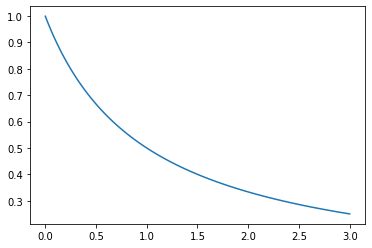

In [6]:
plt.plot(z_arr, a_arr)
plt.show()

For plots in log-log space, we can use `plt.loglog`. And it is always better to start the plot with a figure creation, since it simplifies exporting and adjustments later on.

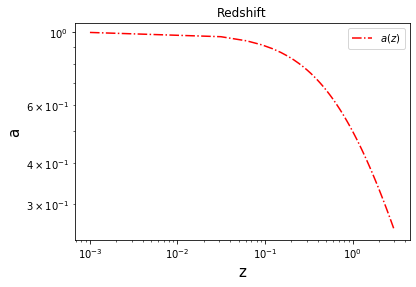

In [7]:
fig = plt.figure()
#Let's add some color and linestyle, r for red and a label for the curve.
plt.loglog(z_arr, a_arr, '-.r', label='$a(z)$')  #notice how you can use LaTeX here
#Let's add a plot title
plt.title("Redshift")
#Let's add a legend
plt.legend()
#Let's add an x-label, with some font-size
plt.xlabel("z", fontsize=15)
# and a y-label, rotated by 90 degrees (which is the default in this case anyway)
plt.ylabel("a", rotation=90, fontsize=15)   
plt.show()

# The Hubble function

The Hubble function $H(z)$ can be found solving Einstein's field equations of General Relativity under the Friedmann-Lemaître-Robertson-Walker metric, i.e. under the assumption of homogeneity and isotropy. It describes the expansion rate (speed) of an observable Universe of size a, $H(a) = \dot{a}/a$.

<a href="" target="_blank"><img align="center" width="300" src="./materials/planck_cosmic_pie.jpg" alt="Cosmic Pie"></a>

If we know the energy and matter components of the Universe today:
   * Cold Dark Matter density $\Omega_c$ 
   * Baryonic (normal) matter density $\Omega_b$
   * Radiation density $\Omega_r$
we can write down the Hubble function as:
$$ H(z) = H_0 * \sqrt{(\Omega_c(1+z)^3 + \Omega_b(1+z)^3) + \Omega_r(1+z)^4 + \Omega_{\Lambda}}$$

where this mysterious component $\Omega_{\Lambda}$, is what we think is causing the accelerated expansion of the Universe and we think it comes from a *Cosmological constant*. In the general case where we are completely ignorant about it, we call it also "Dark Energy", for the lack of a better name.

If the Universe is flat, then $\Omega_{\Lambda}$ is defined by whatever we can't measure and it's simply given by: $$ \Omega_{\Lambda} = 1 - \Omega_c - \Omega_b - \Omega_r $$

> Let's code first this constraint:

In [8]:
def Omega_L(Omega_c, Omega_b, Omega_r):
    oL = 1 - Omega_c - Omega_b - Omega_r
    return oL

> Now let's write a function for $H(z)$. If you still don't know or haven't asked, $H_0$ is the rate of expansion of the universe today and it is measured in km/s/Mpc. Its value can be inferred in many ways, from the Cosmic Microwave Background, from Gravitational Lensing or by measuring the distance to Supernovae. Currently it is a <a href="https://astrobites.org/2019/07/12/h0ly-cow-a-new-measurement-of-the-hubble-constant/" target="_blank" >hot topic</a> in cosmology, since there are strong tensions in measurements from different probes.
A value of $70$ km/s/Mpc, means that a galaxy at a distance of $1$Mpc from us, moves away from us at a speed of $70$km/s.

> To be fancy and practice some dictionary techniques, let's avoid defining so many arguments in the function and let's just pass a dictionary instead, that contains the cosmological parameters.

In [9]:
#import seaborn as sns
#sns.set()

> This function will return default parameters when nothing is passed and can return either all the cosmological parameters or a single one.

In [10]:
def cosmological_parameters(cosmo_pars, which='all'):
    H0 = cosmo_pars.get('H0', 67.32)  # Planck 2018 cosmological parameters as default
    Oc = cosmo_pars.get('Omega_c', 0.26641)
    Ob = cosmo_pars.get('Omega_b', 0.04939)
    Or = cosmo_pars.get('Omega_r', 0.0000930479)
    Om = Ob+Oc
    OL = Omega_L(Oc, Ob, Or)
    default_dict = {'Omega_b': Ob, 
                    'Omega_c':Oc,
                     'Omega_m': Om,
                      'Omega_r':Or,
                       'Omega_L':OL,
                        'H0':H0}
    if which=='all':
        return H0, Oc, Ob, Or, Om, OL
    else:                               # this code is prone to bugs if which is not a string or not a parameter
        return default_dict[which]

> Here we have used `dict.get()` instead of `dict['key']`, since `get('key', default)` allows us to define default values in case the keys are not present in the dictionary. And we have created a keyword argument for cosmo_pars, so we can evaluate $H(z)$ with a single redshift argument:

In [11]:
def Hubble(z, cosmo_pars=dict({None:0})):
    H0, Oc, Ob, Or, Om, OL = cosmological_parameters(cosmo_pars)
    H = H0 * np.sqrt(Om*(1+z)**3 + Or*(1+z)**4 + OL)
    return H

In [12]:
# Notice how we recover the default H_0 when we evaluate at z=0.
Hubble(0.)

67.31999999999998

Let's define a dictionary of cosmological parameters

In [13]:
mycosmo = {'H0': 72, 
          'Omega_c':0.32,
          'Omega_b':0.05}

In [14]:
# Now we get the H_0 we actually provided
Hubble(0., mycosmo)

71.99999999999999

> **Exercise 1**: Create your own cosmology and plot it next to `mycosmo` and the default Planck cosmology, using the colors `red`, `green` and `blue`, respectively. Change also the line styles (`'--', or '-' or ':'`) (You can use the `fmt` keywords or the `color` optional argument). Use a range in redshift from 0. to 10. Use linear scales for the plot `plot`. Hint: Copy as much as possible from the plotting code above.

## Matter, Radiation and Dark Energy densities as a function of time

The density as a function of time of any of those components can be obtained with the Hubble function as follows: 
$$ \Omega_i(z) = \frac{H_0^2 \Omega_i  (1+z)^p}{H^2(z)}$$ 
where $i$ is the component, and $p$ is the exponent corresponding to the specific component.
For matter, $p=3$, for radiation, $p=4$, for the cosmological constant $p=0$.

Let's code this one up, by first creating a dictionary of exponents:

In [15]:
cosmo_pexp = {'Omega_b': 3, 
          'Omega_c':3,
          'Omega_m':3,
             'Omega_r':4,
             'Omega_L':0}

In [16]:
def Omega_of_z(z, component='Omega_c', cosmo_pars=dict({None:0}) ):
    O_generic = cosmological_parameters(cosmo_pars, which=component)
    H0 = cosmological_parameters(cosmo_pars, which='H0')
    p = cosmo_pexp[component]
    O_of_z = (H0**2 * O_generic*(1+z)**p)/np.power(Hubble(z, cosmo_pars),2)
    return O_of_z

Let's check that the function works for a given array

> Now let's plot the evolution of matter and radiation species as a function of redshift for two different cosmologies. For this we will use the subplot functionality. There are many ways of doing this, but the most common one is `plt.subplot(Rows, Cols, *kwargs) `, where some of the optional keyword arguments are for sharing axes or adjusting spaces. It will return a figure instance and an array of axis instances, which can be indexed.

In [17]:
z_arr = np.logspace(-3,2.5, 100)

In [18]:
crazycosmo = {'H0': 75, 
          'Omega_c':0.58,
          'Omega_b':0.06, 
           'Omega_r':0.005}

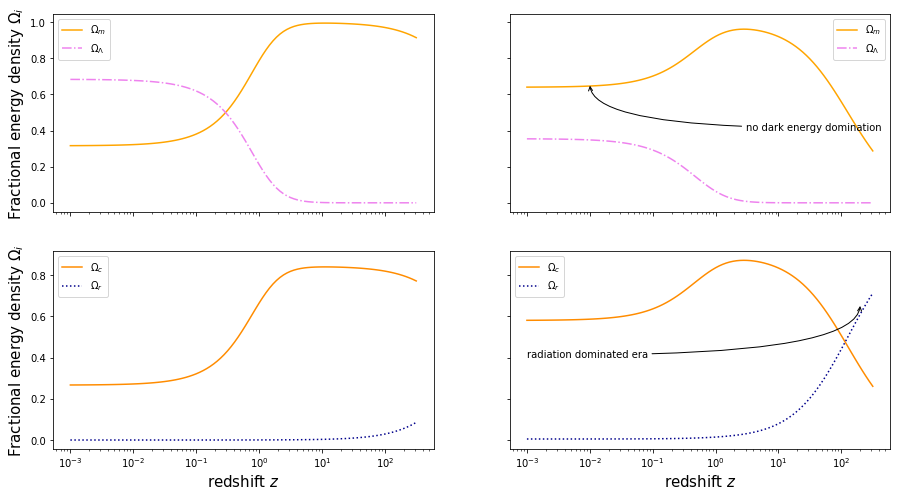

In [33]:
#return a figure object instance and an axis object instance
fig, ax = plt.subplots(2, 2, sharey='row', sharex='col', figsize=(15,8))  #all plots in the same row, share the y-axis.

# once you specify an axis, it is in this instance where plots are performed
ax[0,0].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_m'), '-', label='$\Omega_m$', color='orange')  
ax[0,0].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_L'), '-.', label='$\Omega_{\Lambda}$', color='violet')
ax[0,0].legend()
ax[1,1].set_xlabel('redshift $z$', fontsize=15)   #notice the change from plt.xlabel() -> ax.set_xlabel()
ax[1,0].set_xlabel('redshift $z$', fontsize=15)
ax[0,1].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_m', crazycosmo), '-', label='$\Omega_m$', color='orange')  
ax[0,1].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_L', crazycosmo), '-.', label='$\Omega_{\Lambda}$', color='violet')
ax[0,1].annotate('no dark energy domination', xy=(0.01,0.66), xytext=(3,0.4), 
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle3, angleA=0, angleB=90"))
ax[0,1].legend()
ax[1,0].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_c'), '-', label='$\Omega_c$', color='darkorange')  
ax[1,0].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_r'), ':', label='$\Omega_{r}$', color='darkblue')
ax[1,0].legend()
ax[1,1].set_xlabel('redshift $z$', fontsize=15)   #notice the change from plt.xlabel() -> ax.set_xlabel()
ax[1,0].set_xlabel('redshift $z$', fontsize=15)
ax[1,1].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_c', crazycosmo), '-', label='$\Omega_c$', color='darkorange')  
ax[1,1].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_r', crazycosmo), ':', label='$\Omega_{r}$', color='darkblue')
ax[1,1].legend()
ax[1,1].annotate('radiation dominated era', xy=(200,0.66), xytext=(0.001,0.4), 
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle3, angleA=0, angleB=90"))
ax[1,1].set_xlabel('redshift $z$', fontsize=15)   #notice the change from plt.xlabel() -> ax.set_xlabel()
ax[1,0].set_xlabel('redshift $z$', fontsize=15)   #notice that we only label the bottom 2 plots
ax[0,0].set_ylabel('Fractional energy density $\Omega_i$', fontsize=15)   #notice the change from plt.xlabel() -> ax.set_xlabel()
ax[1,0].set_ylabel('Fractional energy density $\Omega_i$', fontsize=15)   #notice that we only label the bottom 2 plots
plt.show()

In [20]:
## > Notice that despite matplotlib being a
## really nice library, the standard settings
#leave a very rough plot. A way to improve this quickly, is to use `seaborn`.

In [21]:
#import seaborn as sns
#sns.set()